<a href="https://colab.research.google.com/github/farid002/score-predictor/blob/main/notebooks/FootbalPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install telegram python-telegram-bot==12.8 pandas scikit-learn seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 375.4/375.4 kB 6.6 MB/s eta 0:00:00
  Created wheel for telegram: filename=telegram-0.0.1-py3-none-any.whl size=1295 sha256=a0f31bda0fe604143e83f6b32783cfdf811fc0c556098b277a2c6cb6190b66d0
  Stored in directory: /root/.cache/pip/wheels/f3/f2/16/dc6d6c6c7e0422206fec62833039a2b4082de3b85e55d32b52
Successfully built telegram


In [21]:
import requests
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

telegram_bot_token = '6173965356:AAGZ_WrnnYtfU8Z3cb2VKXPhI9aGN8U-GNc'
rapid_api_token = 'e6d3059208mshb6f8204758b3d73p1d6f61jsn965db529a15e'

In [22]:
home_team_id = 157
away_team_id = 169
url = "https://api-football-v1.p.rapidapi.com/v3/fixtures/headtohead"
headers = {
    "X-RapidAPI-Key": rapid_api_token,
    "X-RapidAPI-Host": "api-football-v1.p.rapidapi.com"
}
querystring = {
    "h2h": f"{home_team_id}-{away_team_id}",
}
response = requests.get(url, headers=headers, params=querystring)
data = response.json()
data

{'get': 'fixtures/headtohead',
 'parameters': {'h2h': '157-169'},
 'errors': [],
 'results': 27,
 'paging': {'current': 1, 'total': 1},
 'response': [{'fixture': {'id': 2813,
    'referee': 'Sascha Stegemann, Germany',
    'timezone': 'UTC',
    'date': '2019-05-18T13:30:00+00:00',
    'timestamp': 1558186200,
    'periods': {'first': 1558186200, 'second': 1558189800},
    'venue': {'id': None, 'name': 'Allianz Arena', 'city': 'Munich'},
    'status': {'long': 'Match Finished', 'short': 'FT', 'elapsed': 90}},
   'league': {'id': 78,
    'name': 'Bundesliga',
    'country': 'Germany',
    'logo': 'https://media-3.api-sports.io/football/leagues/78.png',
    'flag': 'https://media-1.api-sports.io/flags/de.svg',
    'season': 2018,
    'round': 'Regular Season - 34'},
   'teams': {'home': {'id': 157,
     'name': 'Bayern Munich',
     'logo': 'https://media-1.api-sports.io/football/teams/157.png',
     'winner': True},
    'away': {'id': 169,
     'name': 'Eintracht Frankfurt',
     'logo'

In [23]:
url = "https://api-football-v1.p.rapidapi.com/v3/fixtures"

querystring = {"team":home_team_id,"last":"20"}

headers = {
	"X-RapidAPI-Key": "e6d3059208mshb6f8204758b3d73p1d6f61jsn965db529a15e",
	"X-RapidAPI-Host": "api-football-v1.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)
home_team_other_matches = response.json()
home_team_other_matches

{'get': 'fixtures',
 'parameters': {'last': '20', 'team': '157'},
 'errors': [],
 'results': 20,
 'paging': {'current': 1, 'total': 1},
 'response': [{'fixture': {'id': 871464,
    'referee': 'S. Jablonski',
    'timezone': 'UTC',
    'date': '2023-05-27T13:30:00+00:00',
    'timestamp': 1685194200,
    'periods': {'first': 1685194200, 'second': 1685197800},
    'venue': {'id': 731, 'name': 'RheinEnergieStadion', 'city': 'Köln'},
    'status': {'long': 'Match Finished', 'short': 'FT', 'elapsed': 90}},
   'league': {'id': 78,
    'name': 'Bundesliga',
    'country': 'Germany',
    'logo': 'https://media-1.api-sports.io/football/leagues/78.png',
    'flag': 'https://media-2.api-sports.io/flags/de.svg',
    'season': 2022,
    'round': 'Regular Season - 34'},
   'teams': {'home': {'id': 192,
     'name': 'FC Koln',
     'logo': 'https://media-2.api-sports.io/football/teams/192.png',
     'winner': False},
    'away': {'id': 157,
     'name': 'Bayern Munich',
     'logo': 'https://media-2.

In [24]:
url = "https://api-football-v1.p.rapidapi.com/v3/fixtures"

querystring = {"team":away_team_id,"last":"20"}

headers = {
	"X-RapidAPI-Key": "e6d3059208mshb6f8204758b3d73p1d6f61jsn965db529a15e",
	"X-RapidAPI-Host": "api-football-v1.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)
away_team_other_matches = response.json()
away_team_other_matches

{'get': 'fixtures',
 'parameters': {'last': '20', 'team': '169'},
 'errors': [],
 'results': 20,
 'paging': {'current': 1, 'total': 1},
 'response': [{'fixture': {'id': 1025223,
    'referee': 'D. Siebert',
    'timezone': 'UTC',
    'date': '2023-06-03T18:00:00+00:00',
    'timestamp': 1685815200,
    'periods': {'first': 1685815200, 'second': 1685818800},
    'venue': {'id': 694, 'name': 'Olympiastadion Berlin', 'city': 'Berlin'},
    'status': {'long': 'Match Finished', 'short': 'FT', 'elapsed': 90}},
   'league': {'id': 81,
    'name': 'DFB Pokal',
    'country': 'Germany',
    'logo': 'https://media-2.api-sports.io/football/leagues/81.png',
    'flag': 'https://media-2.api-sports.io/flags/de.svg',
    'season': 2022,
    'round': 'Final'},
   'teams': {'home': {'id': 173,
     'name': 'RB Leipzig',
     'logo': 'https://media-1.api-sports.io/football/teams/173.png',
     'winner': True},
    'away': {'id': 169,
     'name': 'Eintracht Frankfurt',
     'logo': 'https://media-1.api-

In [25]:
from pandas.core.arrays.string_arrow import ArrowStringArray
team_url = "https://api-football-v1.p.rapidapi.com/v3/teams/statistics"
headers = {
    "X-RapidAPI-Key": rapid_api_token,
    "X-RapidAPI-Host": "api-football-v1.p.rapidapi.com"
}
querystring = {
    "league": "203",
    "season": "2022",
    "team": f"{away_team_id}"
}
response = requests.get(team_url, headers=headers, params=querystring)
home_team_data = response.json()
home_team_data

{'get': 'teams/statistics',
 'parameters': {'league': '203', 'season': '2022', 'team': '169'},
 'errors': [],
 'results': 11,
 'paging': {'current': 1, 'total': 1},
 'response': {'league': {'id': 203,
   'name': 'Süper Lig',
   'country': 'Turkey',
   'logo': 'https://media-2.api-sports.io/football/leagues/203.png',
   'flag': 'https://media-2.api-sports.io/flags/tr.svg',
   'season': 2022},
  'team': {'id': 169,
   'name': 'Eintracht Frankfurt',
   'logo': 'https://media-1.api-sports.io/football/teams/169.png'},
  'form': None,
  'fixtures': {'played': {'home': 0, 'away': 0, 'total': 0},
   'wins': {'home': 0, 'away': 0, 'total': 0},
   'draws': {'home': 0, 'away': 0, 'total': 0},
   'loses': {'home': 0, 'away': 0, 'total': 0}},
  'goals': {'for': {'total': {'home': 0, 'away': 0, 'total': 0},
    'average': {'home': '0.0', 'away': '0.0', 'total': '0.0'},
    'minute': {'0-15': {'total': None, 'percentage': None},
     '16-30': {'total': None, 'percentage': None},
     '31-45': {'total

In [34]:
from numpy import nan

df_h2h = pd.json_normalize(data["response"])
df_home_other = pd.json_normalize(home_team_other_matches["response"])
df_away_other = pd.json_normalize(away_team_other_matches["response"])

df = pd.concat([df_h2h, df_home_other, df_away_other], ignore_index=True)
df
# Filter the data for the specified home and away teams
filtered_data = df[df["fixture.status.short"] != "CANC"]

filtered_data.columns
filtered_data = filtered_data.iloc[:, [0,1,3,7,11,12,13,20,23,24,27,28,29,30,31,32,33,34,35,36,37]]
filtered_data

,fixture.id,fixture.referee,fixture.date,fixture.venue.id,fixture.status.short,fixture.status.elapsed,league.id,teams.home.id,teams.home.winner,teams.away.id,...,goals.home,goals.away,score.halftime.home,score.halftime.away,score.fulltime.home,score.fulltime.away,score.extratime.home,score.extratime.away,score.penalty.home,score.penalty.away
0,2813,"Sascha Stegemann, Germany",2019-05-18T13:30:00+00:00,NaN,FT,90,78,157,True,169,...,5,1,1,0,5,1,None,None,None,None
1,10941,"Christian Dingert, Germany",2018-04-28T13:30:00+00:00,NaN,FT,90,78,157,True,169,...,4,1,1,0,4,1,None,None,None,None
2,16798,"Markus Schmidt, Germany",2017-03-11T14:30:00+00:00,NaN,FT,90,78,157,True,169,...,3,0,2,0,3,0,None,None,None,None
3,57399,None,2018-05-19T18:00:00+00:00,NaN,FT,90,81,157,False,169,...,1,3,0,1,1,3,None,None,None,None
4,194811,"Florian Meyer, Germany",2016-04-02T13:30:00+00:00,NaN,FT,90,78,157,True,169,...,1,0,1,0,1,0,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,871375,R. Hartmann,2023-03-11T14:30:00+00:00,10491.0,FT,90,78,169,None,172,...,1,1,0,0,1,1,None,None,None,None
63,871367,D. Schlager,2023-03-05T16:30:00+00:00,752.0,FT,90,78,161,None,169,...,2,2,2,2,2,2,None,None,None,None
64,871354,F. Brych,2023-02-25T14:30:00+00:00,738.0,FT,90,78,173,True,169,...,2,1,2,0,2,1,None,None,None,None
65,971803,Artur Soares Dias,2023-02-21T20:00:00+00:00,10491.0,FT,90,2,169,False,492,...,0,2,0,1,0,2,None,None,None,None


In [38]:
from datetime import datetime, timedelta


def calculate_form_point(form_str):
  point = 0
  i = 0

  for i, s in enumerate(form_str):
    if(s == "L"):
      continue
    elif(s == "W"):
      point += 3
    elif(s == "D"):
      point += 1
    else:
      TypeError()

  return point/i if i>0 else point



def get_form_last_n(fixture_id, team_id, n):
  url = "https://api-football-v1.p.rapidapi.com/v3/fixtures"
  headers = {
      "X-RapidAPI-Key": rapid_api_token,
      "X-RapidAPI-Host": "api-football-v1.p.rapidapi.com"
  }
  querystring = {
      "id": f"{fixture_id}"
  }
  response = requests.get(url, headers=headers, params=querystring)
  data = response.json()["response"][0]
  result = ""

  if data:
    date_to = data["fixture"]["date"][:10]
    date_from = (datetime.strptime(date_to, '%Y-%m-%d') - timedelta(days=6*30)).strftime('%Y-%m-%d')

    league_id = data["league"]["id"]
    season = data["league"]["season"]

    querystring = {
        "from": f"{date_from}",
        "to": f"{date_to}",
        "season": f"{season}",
        "team": f"{team_id}"
    }
    response = requests.get(url, headers=headers, params=querystring)
    data = response.json().get("response")

    df = pd.json_normalize(data)
    if not df.empty:
      df.sort_values(by="fixture.date", ascending=False)
      df = df[:n]
      form = []

      # Iterate over the filtered DataFrame and append the 'winner' values to the list
      for index, row in df.iterrows():
          if row['teams.home.id'] == team_id:
              form.append(row['teams.home.winner'])
          elif row['teams.away.id'] == team_id:
              form.append(row['teams.away.winner'])

      for f in form[0:n]:
          if f == False:
            result += "L"
          elif f == True:
            result += "W"
          else:
            result += "D"

  return result

In [40]:
import multiprocessing
filtered_data_2 = filtered_data.copy(deep=False)  # just copy not to corrupt data and run previous steps

filtered_data_2["teams.home.form"] = ""
filtered_data_2["teams.away.form"] = ""
filtered_data_2["teams.home.form_point"] = 0
filtered_data_2["teams.away.form_point"] = 0

def update_row(row):
    row["teams.home.form"] = get_form_last_n(row["fixture.id"], row["teams.home.id"], 5)
    row["teams.home.form_point"] = calculate_form_point(row["teams.home.form"])
    row["teams.away.form"] = get_form_last_n(row["fixture.id"], row["teams.away.id"], 5)
    row["teams.away.form_point"] = calculate_form_point(row["teams.away.form"])
    return row

pool = multiprocessing.Pool()

# Apply updates to each row using Pool.apply()
processed_rows = [pool.apply(update_row, args=(row,)) for _, row in filtered_data_2.iterrows()]

# Convert the list of processed rows back to a DataFrame
merged_df = pd.DataFrame(processed_rows)

merged_df

,fixture.id,fixture.referee,fixture.date,fixture.venue.id,fixture.status.short,fixture.status.elapsed,league.id,teams.home.id,teams.home.winner,teams.away.id,...,score.fulltime.home,score.fulltime.away,score.extratime.home,score.extratime.away,score.penalty.home,score.penalty.away,teams.home.form,teams.away.form,teams.home.form_point,teams.away.form_point
0,2813,"Sascha Stegemann, Germany",2019-05-18T13:30:00+00:00,NaN,FT,90,78,157,True,169,...,5,1,None,None,None,None,DWWWW,WLLWD,3.25,1.75
1,10941,"Christian Dingert, Germany",2018-04-28T13:30:00+00:00,NaN,FT,90,78,157,True,169,...,4,1,None,None,None,None,WWWWW,LLLDL,3.75,0.25
2,16798,"Markus Schmidt, Germany",2017-03-11T14:30:00+00:00,NaN,FT,90,78,157,True,169,...,3,0,None,None,None,None,WWWDW,LLLLL,3.25,0.00
3,57399,None,2018-05-19T18:00:00+00:00,NaN,FT,90,81,157,False,169,...,1,3,None,None,None,None,LWWWW,LWLLL,3.00,0.75
4,194811,"Florian Meyer, Germany",2016-04-02T13:30:00+00:00,NaN,FT,90,78,157,True,169,...,1,0,None,None,None,None,WLWWD,LWLDD,2.50,1.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,871375,R. Hartmann,2023-03-11T14:30:00+00:00,10491.0,FT,90,78,169,None,172,...,1,1,None,None,None,None,WWLWW,LLLWL,3.00,0.75
63,871367,D. Schlager,2023-03-05T16:30:00+00:00,752.0,FT,90,78,161,None,169,...,2,2,None,None,None,None,WLWDD,LWWLW,2.00,2.25
64,871354,F. Brych,2023-02-25T14:30:00+00:00,738.0,FT,90,78,173,True,169,...,2,1,None,None,None,None,WLWLW,WLWWL,2.25,2.25
65,971803,Artur Soares Dias,2023-02-21T20:00:00+00:00,10491.0,FT,90,2,169,False,492,...,0,2,None,None,None,None,WWLWW,DDWWW,3.00,2.75


In [42]:
filtered_data_3 = merged_df.copy(deep=False)  # just copy not to corrupt data and run previous steps

0     2
1     2
2     2
3     0
4     2
     ..
62    1
63    1
64    2
65    0
66    2
Name: teams.home.winner, Length: 67, dtype: int64


<ipython-input-44-c4e82c5c220a>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(filtered_data_3.corr())


<Axes: >

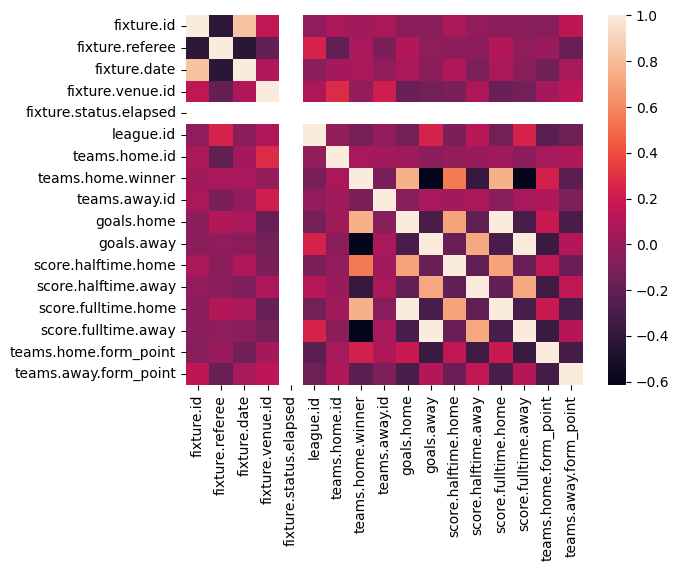

In [44]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

def custom_mapping(x):
    mapping = {False: 0, None: 1, True: 2}
    return mapping.get(x, x)

le = LabelEncoder()
filtered_data_3["fixture.referee"] = le.fit_transform(filtered_data_3["fixture.referee"])
filtered_data_3["fixture.date"] = le.fit_transform(filtered_data_3["fixture.date"])
filtered_data_3["teams.home.winner"] = filtered_data_3["teams.home.winner"].apply(custom_mapping)
print(filtered_data_3["teams.home.winner"])
sns.heatmap(filtered_data_3.corr())


In [64]:
filtered_data_3.columns
X = filtered_data_3
X = X.fillna(0)
X.columns


Index(['fixture.id', 'fixture.referee', 'fixture.date', 'fixture.venue.id',
       'fixture.status.short', 'fixture.status.elapsed', 'league.id',
       'teams.home.id', 'teams.home.winner', 'teams.away.id',
       'teams.away.winner', 'goals.home', 'goals.away', 'score.halftime.home',
       'score.halftime.away', 'score.fulltime.home', 'score.fulltime.away',
       'score.extratime.home', 'score.extratime.away', 'score.penalty.home',
       'score.penalty.away', 'teams.home.form', 'teams.away.form',
       'teams.home.form_point', 'teams.away.form_point'],
      dtype='object')

<ipython-input-65-2020b6e3ff64>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(X.corr(), fmt=".2f")


<Axes: >

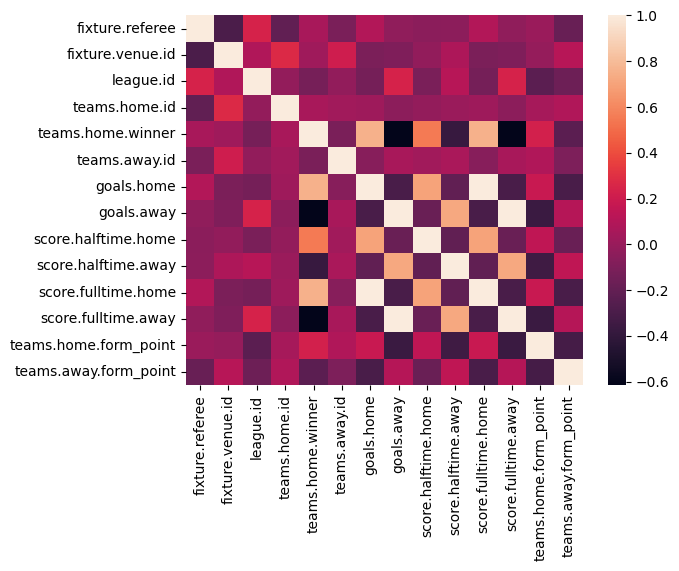

In [65]:
X = X.iloc[:, [1,3,6,7,8,9,10,11,12,13,14,15,16,23,24]]
sns.heatmap(X.corr(), fmt=".2f")

In [66]:
y = filtered_data_3["teams.home.winner"].tolist()
y

[2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 1,
 1,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 1,
 2,
 2,
 0,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 0,
 2]

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
y_test


[0, 2, 2, 1, 2, 2, 2, 0, 2, 0, 2, 1, 2, 1]

In [75]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [76]:
import numpy as np
y_pred = model.predict(X_test)
# y_pred = np.around(y_pred)
print(y_test)
print(y_pred)

[0, 2, 2, 1, 2, 2, 2, 0, 2, 0, 2, 1, 2, 1]
[0. 2. 2. 1. 2. 2. 2. 0. 2. 0. 2. 1. 2. 1.]


In [70]:
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

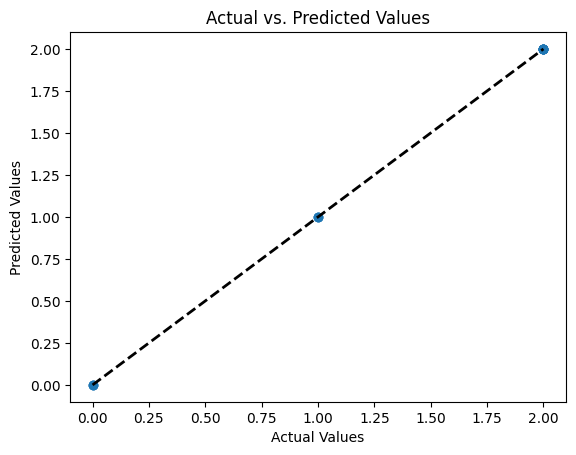

In [73]:
# Plotting the graph
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)  # Plotting the diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()